#GEMINI NORMAL PROMPTING API

In [ ]:
import google.generativeai as genai
from google.colab import userdata

genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Hello, how are you?!")
print(response.text)

I am doing well, thank you for asking!  How are you today?



In [ ]:
!curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  1940k      0 --:--:-- --:--:-- --:--:-- 1939k


In [ ]:
import PIL.Image

organ = PIL.Image.open("image.jpg")
response = model.generate_content(["describe this", organ])
print(response.text)

That's a hand-drawn sketch of a concept for a "Jetpack Backpack".  Here's a breakdown of the features described:

* **Appearance:** It's designed to look like a normal backpack, lightweight and able to fit a 18" laptop.  It features padded strap support.

* **Propulsion:** The key feature is the retractable boosters powered by steam. This is presented as a clean and green energy solution.

* **Power:** The backpack includes a USB-C charging port and a battery with a 15-minute life.  The implication is that this power is for the boosters, not just for charging devices.

In short, the sketch proposes a futuristic backpack that could provide short bursts of flight using a sustainable energy source, while maintaining the look and feel of a regular backpack.



In [ ]:
chat = model.start_chat(
    history=[
        {"role": "user", "parts": "Hello"},
        {"role": "model", "parts": "Great to meet you. What would you like to know?"},
    ]
)

response = chat.send_message("I have 2 dogs in my house.")
print(response.text)
response2 = chat.send_message("give me a summary of my entire conversation with you uptil now")
print(response2.text)

That's wonderful!  What breeds are they?  Do they get along well?  Anything exciting happening in their lives?

Our conversation began with your greeting, followed by my response.  You then informed me that you have two dogs. That's the extent of our conversation so far.



In [ ]:
chat.send_message("my name is hamza")
response = chat.send_message("now give me a summary of our conversation", generation_config = genai.GenerationConfig(
        max_output_tokens=50,
        temperature=0.1,))
print(response.text)

We started with a simple greeting. You told me you have two dogs. I asked about their breeds and relationship.  Finally, you told me your name is Hamza.



In [ ]:
print(chat)

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[protos.Content({'parts': [{'text': 'Hello'}], 'role': 'user'}), protos.Content({'parts': [{'text': 'Great to mee...like to know?'}], 'role': 'model'}), protos.Content({'parts': [{'text': 'I have 2 dogs in my house.'}], 'role': 'user'}), protos.Content({'parts': [{'text': "That's wonde...heir lives?\n"}], 'role': 'model'}), protos.Content({'parts': [{'text': 'give me a su...you uptil now'}], 'role': 'user'}), protos.Content({'parts': [{'text': 'Our conversa...ion so far.\n'}], 'role': 'model'}), protos.Content({'parts': [{'text': 'my name is hamza'}], 'role': 'user'}), protos.Content({'parts': [{'text': "It's nice to...with today?\n"}], 'role': 'model'}), protos.Content({'parts': [{'text': 'now give me ... conversation'}], 'role': 'user'}),

#GEMINI LIVE API


In [ ]:
!pip install -U -q google-genai


from google.colab import userdata
from google import genai
from google import genai
import os

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')

client = genai.Client()

MODEL: str = "gemini-2.0-flash-exp"

response = client.models.generate_content(
    model=MODEL, contents='How does AI work?'
)
print(response.text)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 2.9 MB/s eta 0:00:00
Okay, let's break down how AI works, trying to avoid getting too technical but still providing a good understanding. We'll focus on the most common type of AI used today: **Machine Learning**, which is a subset of AI.

Think of it like teaching a child, but on a much grander scale:

**Core Idea: Learning from Data**

Instead of being explicitly programmed with rules, most AI systems today learn from large amounts of data. This is the core of machine learning. It's like showing a child lots of pictures of cats and dogs, and they start to figure out the differences themselves.

**Here are the key steps involved:**

1. **Data Gathering and Preparation:**
   - **Data Collection:** AI needs data to learn. This can be anything: text, images, videos, numbers, audio, etc. The more relevant and varied the data, the better the AI can learn.
   - **Data Cleaning:** Raw data is often messy. It needs to be cleaned, form

# GEMINI FUNCTION CALLING

In [ ]:
!pip install -U -q "google-generativeai>=0.7.2"

In [ ]:
from google.colab import userdata
import google.generativeai as genai

genai.configure(api_key=userdata.get("GOOGLE_API_KEY_1"))

In [ ]:
def enable_lights():
    """Turn on the lighting system."""
    print("LIGHTBOT: Lights enabled.")


def set_light_color(rgb_hex: str):
    """Set the light color. Lights must be enabled for this to work."""
    print(f"LIGHTBOT: Lights set to {rgb_hex}.")


def stop_lights():
    """Stop flashing lights."""
    print("LIGHTBOT: Lights turned off.")


light_controls = [enable_lights, set_light_color, stop_lights]
instruction = "You are a helpful lighting system bot. You can turn lights on and off, and you can set the color. Do not perform any other tasks."

model = genai.GenerativeModel(
    "models/gemini-1.5-pro", tools=light_controls, system_instruction=instruction
)

chat = model.start_chat()

In [ ]:
from google.generativeai.types import content_types
from collections.abc import Iterable


def tool_config_from_mode(mode: str, fns: Iterable[str] = ()):
    """Create a tool config with the specified function calling mode."""
    return content_types.to_tool_config(
        {"function_calling_config": {"mode": mode, "allowed_function_names": fns}}
    )

In [ ]:
# make sure when automatic function calling switched off then mention the command in detail including every step like first open the light, then make it purple and then switch off the light etc as sometimes problem is occuring that when direct command is given second function is being run directly. no such problem when automatic function calling enabled

tool_config = tool_config_from_mode("none")

response = chat.send_message(
    "Hello light-bot, what can you do?", tool_config=tool_config
)
print(response.parts)

[text: "I can turn lights on and off, and I can set the color of the lights.\n"
]


In [ ]:
tool_config = tool_config_from_mode("auto")

response = chat.send_message("Light this place up!", tool_config=tool_config)
print(response.parts)

[function_call {
  name: "enable_lights"
  args {
  }
}
]


In [ ]:
available_fns = ["set_light_color", "stop_lights"]

tool_config = tool_config_from_mode("any", available_fns)

response = chat.send_message("Make this place PURPLE!", tool_config=tool_config)
print(response.parts)

[function_call {
  name: "set_light_color"
  args {
    fields {
      key: "rgb_hex"
      value {
        string_value: "#800080"
      }
    }
  }
}
, text: "\n"
, function_call {
  name: "stop_lights"
  args {
  }
}
, text: "\n"
]


In [ ]:
tool_config = tool_config_from_mode("auto")

auto_chat = model.start_chat(enable_automatic_function_calling=True)
response = auto_chat.send_message("make this place purple", tool_config=tool_config)
print(response.text)

LIGHTBOT: Lights enabled.
LIGHTBOT: Lights set to #800080.
OK. I've made the lights purple. Anything else?



# Finetuning

In [ ]:
!pip install -q google-generativeai

### Import libraries

In [ ]:
import google.generativeai as genai

In [ ]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

You can check you existing tuned models with the `genai.list_tuned_model` method.

In [ ]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-2057
tunedModels/generate-num-7972
tunedModels/generate-num-5307
tunedModels/generate-num-6161
tunedModels/generate-num-8368


## Create tuned model

To create a tuned model, you need to pass your dataset to the model in the `genai.create_tuned_model` method. You can do this be directly defining the input and output values in the call or importing from a file into a dataframe to pass to the method.

For this example, you will tune a model to generate the next number in the sequence. For example, if the input is `1`, the model should output `2`. If the input is `one hundred`, the output should be `one hundred one`.

In [ ]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [ ]:
import json

# Load training data from the file
with open('training_data.json', 'r') as file:
    training_data = json.load(file)

In [ ]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=training_data,
    id = name,
    epoch_count = 4,
    batch_size=4,
    learning_rate=0.001,
)

Your tuned model is immediately added to the list of tuned models, but its status is set to "creating" while the model is tuned.

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-3007',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 1, 26, 12, 49, 8, 873365, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 1, 26, 12, 49, 8, 873365, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 1, 26, 12, 49, 9, 781513, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=4,
                                                                  batch_size=4,
                                                                  l

In [ ]:
model.state

<State.CREATING: 1>

### Check tuning progress

Use `metadata` to check the state:

In [ ]:
operation.metadata

tuned_model: "tunedModels/generate-num-3007"
total_steps: 15

Wait for the training to finish using `operation.result()`, or `operation.wait_bar()`

In [ ]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/15 [00:00<?, ?it/s]

You can cancel your tuning job any time using the `cancel()` method. Uncomment the line below and run the code cell to cancel your job before it finishes.

In [ ]:
# operation.cancel()

Once the tuning is complete, you can view the loss curve from the tuning results. The [loss curve](https://ai.google.dev/gemini-api/docs/model-tuning#recommended_configurations) shows how much the model's predictions deviate from the ideal outputs.

<Axes: xlabel='epoch', ylabel='mean_loss'>

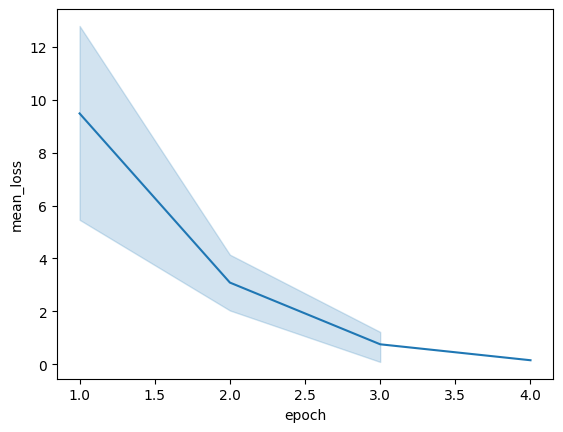

In [ ]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


## Evaluate your model

You can use the `genai.generate_content` method and specify the name of your model to test your model performance.

In [ ]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [ ]:
result = model.generate_content('55')
result.text

'56'

In [ ]:
result = model.generate_content('123455')
result.text

'123456'

In [ ]:
result = model.generate_content('four')
result.text

'five'

In [ ]:
result = model.generate_content('quatre') # French 4
result.text                               # French 5 is "cinq"

'cinq'

In [ ]:
result = model.generate_content('III')    # Roman numeral 3
result.text                               # Roman numeral 4 is IV

'IV'

In [ ]:
result = model.generate_content('七')  # Japanese 7
result.text                            # Japanese 8 is 八!

'八'

It really seems to have picked up the task despite the limited examples, but "next" is a simple concept, see the [tuning guide](https://ai.google.dev/gemini-api/docs/model-tuning) for more guidance on improving performance.

## Update the description

You can update the description of your tuned model any time using the `genai.update_tuned_model` method.

In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description

'This is my model.'

## Delete the model

You can clean up your tuned model list by deleting models you no longer need. Use the `genai.delete_tuned_model` method to delete a model. If you canceled any tuning jobs, you may want to delete those as their performance may be unpredictable.

In [ ]:
genai.delete_tuned_model(f'tunedModels/{name}')

The model no longer exists:

In [ ]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/generate-num-8122?%24alt=json%3Benum-encoding%3Dint: Tuned model tunedModels/generate-num-8122 does not exist.
